<a href="https://colab.research.google.com/github/Volhamster/ML_labs/blob/main/Kotova_RK1_extra_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PK

horse

surgery - наличие операций у лошади ("yes"/"no"/None)

age - возраст лошади ("adult"/"young")

hospital_number - номер госпиталя

rectal_temp - температура тела лошади

pulse - пульс

respiratory_rate - распираторный показатель

temp_of_extremities - температура конечностей ("cool")

peripheral_pulse - периферийный пульс ("reduced")

mucous_membrane - состояние слизистой оболочки ("pale_cyanotic")

capillary_refill_time - время наполнения капилляров ("more_3_sec")

pain - боль ("extreme_pain")

peristalsis - перистальтика ("absent")

abdominal_distention - вздутие живота ("severe")

nasogastric_tube - назогостальная трубка ("slight")

nasogastric_reflux - назогостальный рефлюкс ("less_1_liter")

nasogastric_reflux_ph - назогостальный рефлюкс численный

rectal_exam_feces - ректальное исследование фекалий ("decreased")

abdomen - живот ("distend_large")

packed_cell_volume - объем упакованной ячейки что бы это ни было

total_protein - общий протеин

abdomo_appearance - внешний вид живота ("serosanguious")

abdomo_protein - брюшной белок

outcome - исход ("died")

surgical_lesion - хирургическое поражение ("yes"/"no")

lesion_1 - поражение 1

lesion_2 - поражение 2

lesion_3 - поражение 3

cp_data - ("yes"/"no")

In [1]:
# необходимые пакеты
import matplotlib.pyplot as plt
import seaborn as sns

import random 
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

# модели
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# дополнительные части моделей
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# metric
from sklearn.metrics import mean_absolute_error, r2_score # метрики регрессии 
# метрики для классификации
from sklearn.metrics import roc_auc_score, log_loss, precision_score,recall_score, precision_recall_curve,roc_curve, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# input
DATASET_PATH = '/content/horse.csv'

df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


**Предикторы - 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'**

**Целевая переменная - Outcome**

In [ ]:
df.info()

Как можно видеть, многие данные имеют значение Null. Признак nasogastric_reflux_ph не имеет значений для большинства данных (примерно 5/6), поэтому не будем его рассматривать.

In [4]:
df.drop('nasogastric_reflux_ph', axis=1, inplace=True)

Выведем такие данные, имеющие пробелы.

In [5]:
df[df.isnull().any(axis=1)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,no,adult,533902,38.5,40.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,67.0,NaN,NaN,lived,no,0,0,0,no
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no


Большинство данных имеют None значения, причем в разных столбцах, поэтому больше нельзя исключить какой-то столбец из рассмотрения.

In [6]:
features = ['surgery',
'age',
'hospital_number',
'rectal_temp',
'pulse',
'respiratory_rate',
'temp_of_extremities',
'peripheral_pulse',
'mucous_membrane',
'capillary_refill_time',
'pain',
'peristalsis',
'abdominal_distention',
'nasogastric_tube',
'nasogastric_reflux',
'rectal_exam_feces',
'abdomen',
'packed_cell_volume',
'total_protein',
'abdomo_appearance',
'abdomo_protein',
'surgical_lesion',
'lesion_1',
'lesion_2',
'lesion_3',
'cp_data']
target = 'outcome'

Необходимо заменить None значения на средние (для численных признаков) или максимальные по встречаемости (для категориальных) значения. 

In [7]:
def get_key(val_dict: dict, val):
  for key in val_dict.keys():
    if val_dict[key] == val:
      return key

def get_most_freq(field_name):
  dict_val = df[field_name].value_counts()
  val = max(dict_val)
  res = get_key(dict_val, val)
  if res != "none":
    return res
  else:
    sorted_vals = sorted(df[field_name].value_counts())
    res = get_key(dict_val, sorted_vals[-2])
    return res


cleanup_nans = {"rectal_temp": df["rectal_temp"].median(),
                 "pulse": df["pulse"].median(),
                 "respiratory_rate": df["respiratory_rate"].median(),
                 "packed_cell_volume": df["packed_cell_volume"].median(),
                 "total_protein": df["total_protein"].median(),
                 "abdomo_protein": df["abdomo_protein"].median(),
                 "temp_of_extremities": get_most_freq("temp_of_extremities"),
                 "peripheral_pulse": get_most_freq("peripheral_pulse"),
                 "mucous_membrane": get_most_freq("mucous_membrane"),
                 "capillary_refill_time": get_most_freq("capillary_refill_time"),
                 "pain": get_most_freq("pain"),
                 "peristalsis": get_most_freq("peristalsis"),
                 "abdominal_distention": get_most_freq("abdominal_distention"),
                 "nasogastric_tube": get_most_freq("nasogastric_tube"),
                 "nasogastric_reflux": get_most_freq("nasogastric_reflux"),
                 "rectal_exam_feces": get_most_freq("rectal_exam_feces"),
                 "abdomen": get_most_freq("abdomen"),
                 "abdomo_appearance": get_most_freq("abdomo_appearance"),
                 "surgical_lesion": get_most_freq("surgical_lesion"),
                 }

df = df.fillna(cleanup_nans)

for feat in features:
  df = df.replace({feat: {"none": get_most_freq(feat)}})

df[df.isnull().any(axis=1)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


In [8]:
feature_num_f = [feat for feat in features if df[feat].dtype in ['float64','float32']]
feature_num_i = [feat for feat in features if df[feat].dtype in ['int64','int32']]
feature_num_f,feature_num_i

(['rectal_temp',
  'pulse',
  'respiratory_rate',
  'packed_cell_volume',
  'total_protein',
  'abdomo_protein'],
 ['hospital_number', 'lesion_1', 'lesion_2', 'lesion_3'])

**Распределение числовых признаков:**

In [ ]:
for name in feature_num_f:
    try:
        plt.subplot(1,2,1)
        sns.kdeplot(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.subplot(1,2,2)
        plt.hist(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

for name in feature_num_i:
    try:
        plt.hist(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')        

**Вывод: Признаки hospital_number, lesion_1, lesion_2, lesion_3 категориальные. Остальные графики удовлетворяют требованиям**

In [10]:
feature_cat = [feat for feat in features if df[feat].dtype not in ['int64','float64']]+['hospital_number', 'lesion_1','lesion_2', 'lesion_3']
feature_cat

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data',
 'hospital_number',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [11]:
feature_num = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
feature_num

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein']

**Определение числа признаков:**

In [12]:
for name in feature_cat:
    print( name,': число категорий: ' ,len(df.loc[:, name].unique()))
# print("outcome",': число категорий: ' ,len(df.loc[:, "outcome"].unique()))

surgery : число категорий:  2
age : число категорий:  2
temp_of_extremities : число категорий:  4
peripheral_pulse : число категорий:  4
mucous_membrane : число категорий:  6
capillary_refill_time : число категорий:  3
pain : число категорий:  5
peristalsis : число категорий:  4
abdominal_distention : число категорий:  3
nasogastric_tube : число категорий:  2
nasogastric_reflux : число категорий:  2
rectal_exam_feces : число категорий:  4
abdomen : число категорий:  5
abdomo_appearance : число категорий:  3
surgical_lesion : число категорий:  2
cp_data : число категорий:  2
hospital_number : число категорий:  283
lesion_1 : число категорий:  61
lesion_2 : число категорий:  6
lesion_3 : число категорий:  2


In [13]:
for name in feature_cat:
    print('---------------------------------')
    print('Признак ',name,':')
    print(df.loc[:, name ].value_counts())
print(df.loc[:, 'outcome'].value_counts())

---------------------------------
Признак  surgery :
yes    180
no     119
Name: surgery, dtype: int64
---------------------------------
Признак  age :
adult    275
young     24
Name: age, dtype: int64
---------------------------------
Признак  temp_of_extremities :
cool      164
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64
---------------------------------
Признак  peripheral_pulse :
normal       183
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64
---------------------------------
Признак  mucous_membrane :
normal_pink      126
pale_pink         57
pale_cyanotic     41
bright_pink       30
bright_red        25
dark_cyanotic     20
Name: mucous_membrane, dtype: int64
---------------------------------
Признак  capillary_refill_time :
less_3_sec    219
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64
---------------------------------
Признак  pain :
mild_pain       122
depressed     

Следующим признакам соответствуют два значения:
surgery - yes/no
age - young/adult
nasogastric_tube - slight/significant
nasogastric_reflux - more_1_liter/less_1_liter
surgical_lesion - yes/no
cp_data - yes/no

**Вывод: необходимо для удобства заменить категориальные признаки с двумя значениями на булевские значения**

Также для получения ROC-кривой заменим для целевого признака значения,  соответсвующие исходам "умер" и "усыплен" на 0, "жив" на 1 (для ROC-кривой необходимо чтобы количество целевых признаков было 2)

In [14]:
cleanup_bools = {"surgery": {"yes": True, "no": False},
                 "age": {"young": True, "adult": False},
                 "nasogastric_tube": {"slight": True, "significant": False},
                 "nasogastric_reflux": {"more_1_liter": True, "less_1_liter": False},
                 "surgical_lesion": {"yes": True, "no": False},
                 "cp_data": {"yes": True, "no": False},
                 "outcome": {"died": 0, "euthanized": 0, "lived": 1}
                 }

df = df.replace(cleanup_bools)

Приведем значения категориальных данных к численным для того, чтобы учитывать их при построении модели. 

In [15]:
cleanup_сat = {"temp_of_extremities": {"cool": 0, "normal": 1, "warm": 2, "cold": 3},
               "peripheral_pulse": {"normal": 0, "reduced": 1, "absent": 2, "increased": 3},
               "mucous_membrane": {"normal_pink": 0, "pale_pink": 1, "pale_cyanotic": 2, "bright_pink": 3, "bright_red": 4, "dark_cyanotic": 5},
               "capillary_refill_time": {"less_3_sec": -1, "3": 0, "more_3_sec": 1},
               "pain": {"mild_pain": 0, "depressed": 1, "extreme_pain": 2, "severe_pain": 3, "alert": 4},
               "peristalsis": {"normal": 0, "absent": 1, "hypermotile": 2, "hypomotile": 3},
               "abdominal_distention": {"slight": 0, "moderate": 1, "severe": 2},
               "rectal_exam_feces": {"absent": 0, "normal": 1, "decreased": 2, "increased": 3},
               "abdomen": {"distend_large": 0, "distend_small": 1, "normal": 2, "other": 3, "firm": 4},
               "abdomo_appearance": {"cloudy": 0, "serosanguious": 1, "clear": 2}
}

df = df.replace(cleanup_сat)

**Разделим данные на тестовые и тренировочные**

In [16]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

(224, 1)
(224, 1)
(224, 1)
(224, 1)
(224, 1)
(224, 1)


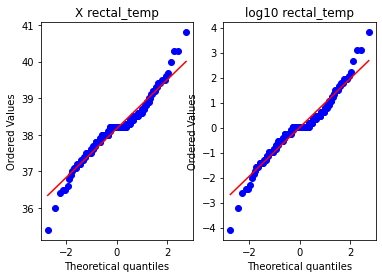

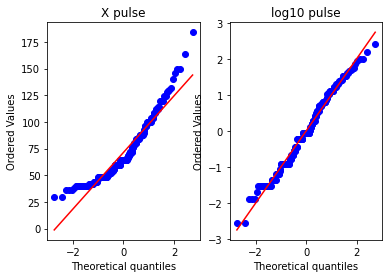

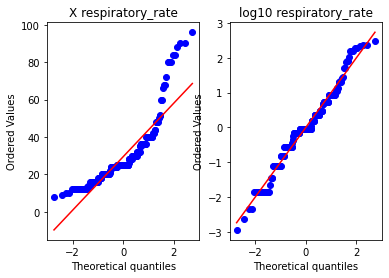

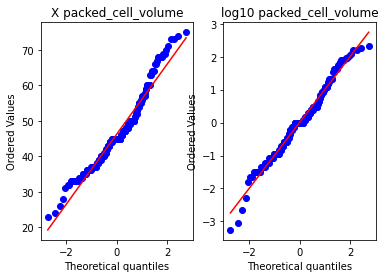

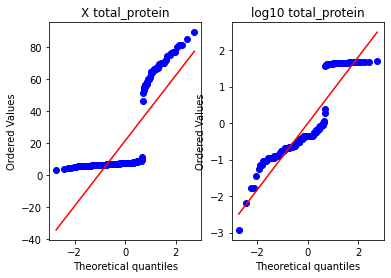

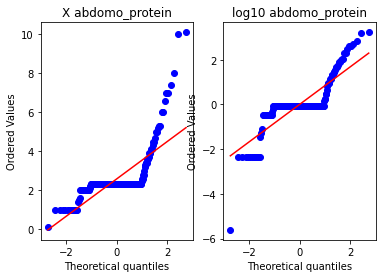

In [17]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

for name in feature_num:
    try:
        vPower = PowerTransformer().fit(X_train[name].values.reshape(-1,1)+1)
        yv = vPower.transform(X_train[name].values.reshape(-1,1)+1)
        print(yv.shape)
        fig1, (ax1, ax2) = plt.subplots(1,2)
        p1 = stats.probplot(X_train[name], dist=stats.norm, plot=ax1)
        p2 = stats.probplot(yv[:,0], dist=stats.norm, plot=ax2)
        ax1.set_title('X '+name)
        ax2.set_title('log10 '+name)

    except:
        print('для ',name,' ошибка работы')

**Вывод: данные приближены к нормальным.** Хуже всего распределения у признаков total_protein и abdomo_protein.

In [18]:
X1 =X_train.loc[y_train == 1, :]
X0 =X_train.loc[y_train == 0, :]

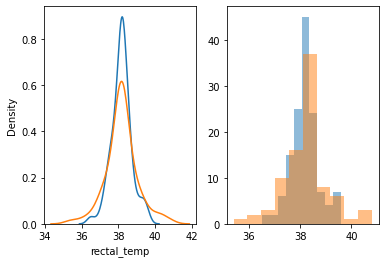

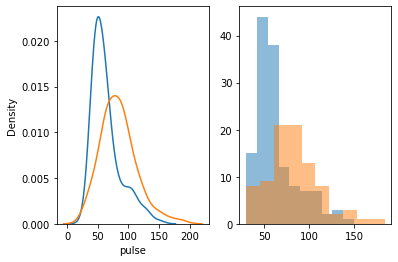

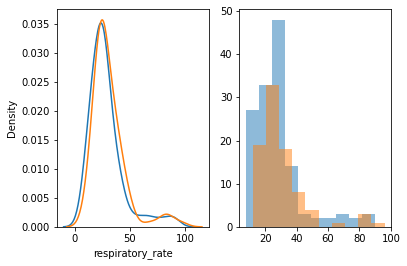

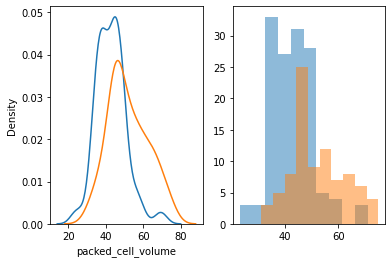

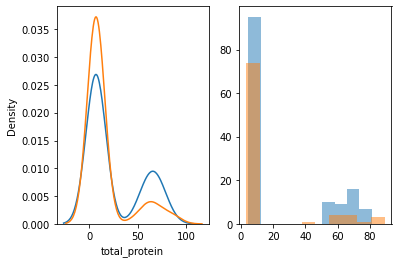

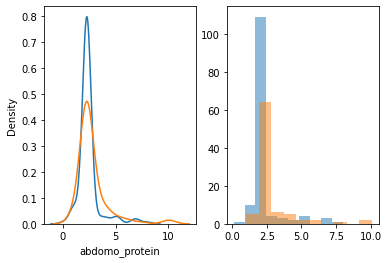

In [19]:
for name in feature_num_f:
    try:
        plt.subplot(1,2,1)
        sns.kdeplot(X1[name])
        sns.kdeplot(X0[name])
        # sns.kdeplot(X2[name])
        plt.subplot(1,2,2)
        plt.hist(X1[name], alpha = 0.5)
        plt.hist(X0[name], alpha = 0.5)
        # plt.hist(X2[name], alpha = 0.5)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

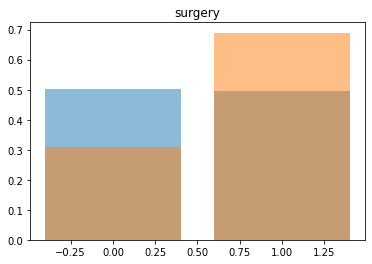

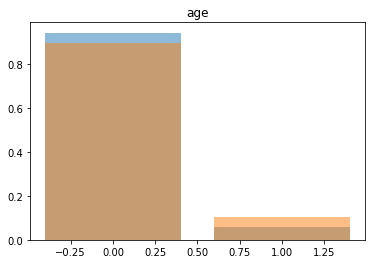

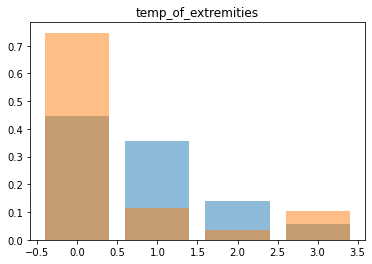

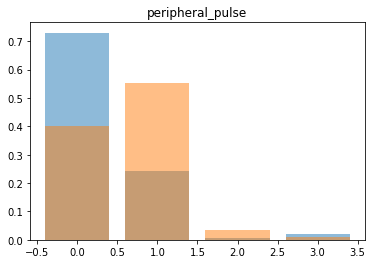

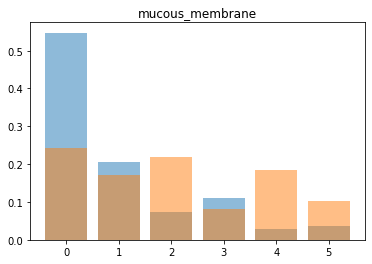

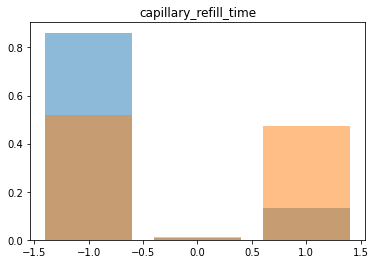

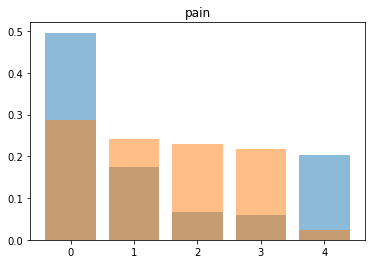

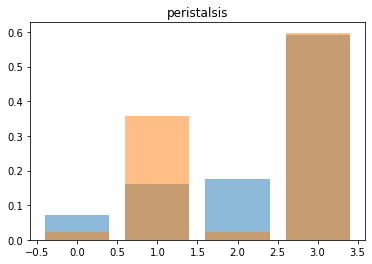

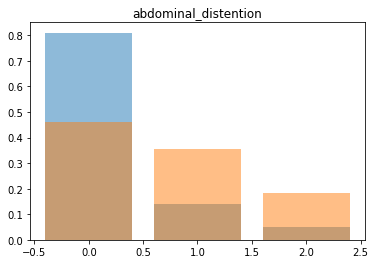

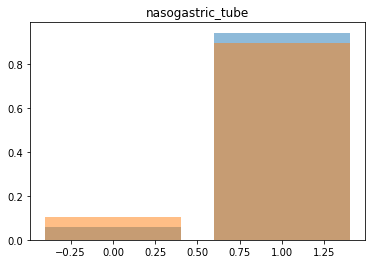

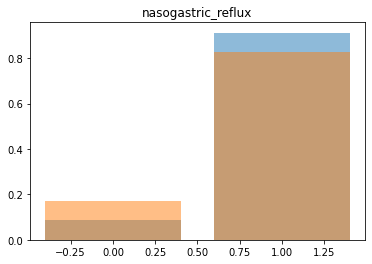

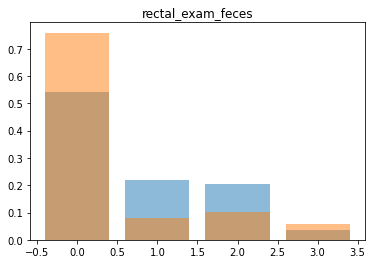

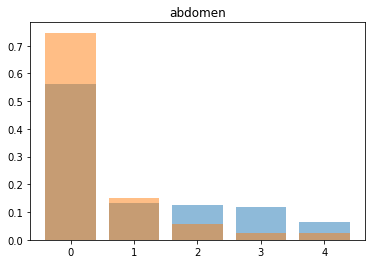

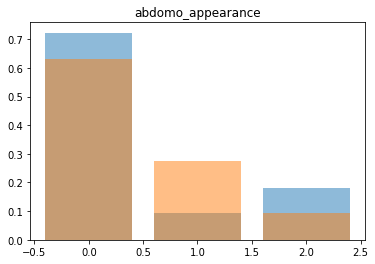

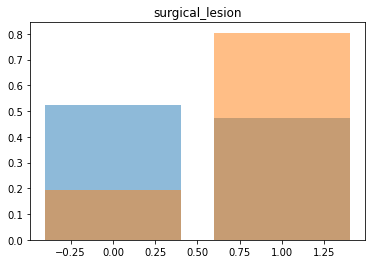

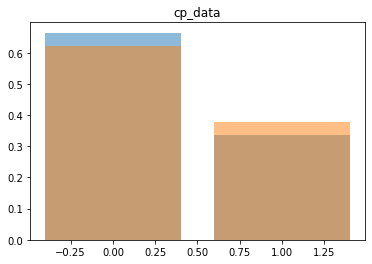

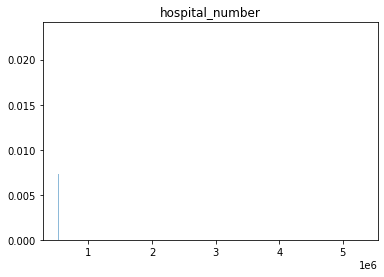

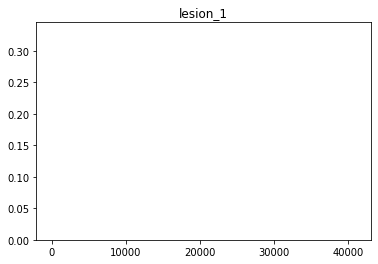

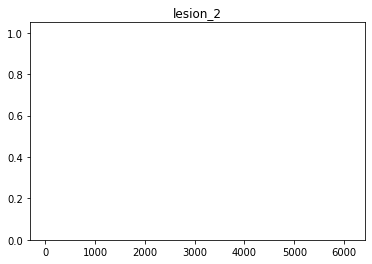

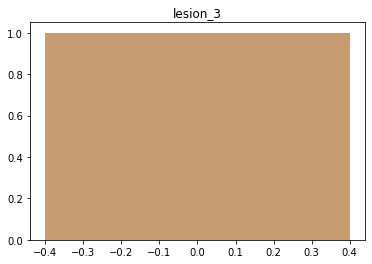

In [20]:
for name in feature_cat:
    try:
        b1 = X1[name].value_counts(normalize=True)
        b0 = X0[name].value_counts(normalize=True)
        # b2 = X2[name].value_counts(normalize=True)
        plt.bar(b1.index,b1.values, alpha=0.5)
        plt.bar(b0.index,b0.values, alpha=0.5)
        # plt.bar(b2.index,b2.values, alpha=0.5)
        plt.title(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

**Вывод: кроме признаков hospital_number, lesion_1, lesion_2, lesion_3 данные сбалансированы, действий не требуется. Как следует из смысла и значений данных, которые несбалансированы, можно сделать вывод, что нет необходимсоти в их рассмотрении, поэтому удалим их из рассмотрения**

In [21]:
X_train.drop('hospital_number',axis=1,inplace=True)
X_test.drop('hospital_number',axis=1,inplace=True)

X_train.drop('lesion_1',axis=1,inplace=True)
X_test.drop('lesion_1',axis=1,inplace=True)

X_train.drop('lesion_2',axis=1,inplace=True)
X_test.drop('lesion_2',axis=1,inplace=True)

X_train.drop('lesion_3',axis=1,inplace=True)
X_test.drop('lesion_3',axis=1,inplace=True)

# Создание модели



**Удалим из тестовых и тренировочных данных категориальные признаки для удобства:**
temp_of_extremities, abdomo_appearance, 

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class preprocess_data(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self):
        
        self.CatPower = PowerTransformer()
        self.FPower = PowerTransformer()
        self.IntPower = PowerTransformer()
        self.cat = []


    def fit(self, X, y=None):
        self.cat = [feat for feat in X.columns if X[feat].dtype not in ['int64','float64']]
        X.loc[:, self.cat] = X.loc[:, self.cat].astype(str)

        return self

    def transform(self, X):
        X.loc[:, self.cat] = X.loc[:, self.cat].astype(str)
       
        X['rectal_temp']=self.FPower.transform(X['rectal_temp'].values.reshape(-1,1)+1)
        X['pulse'] = self.IntPower.transform(X['pulse'].values.reshape(-1,1)+1)
        X['respiratory_rate'] = self.IntPower.transform(X['respiratory_rate'].values.reshape(-1,1)+1)
        X['packed_cell_volume'] = self.IntPower.transform(X['packed_cell_volume'].values.reshape(-1,1)+1)
        X['total_protein'] = self.FPower.transform(X['total_protein'].values.reshape(-1,1)+1)
        X['abdomo_protein']=self.FPower.transform(X['abdomo_protein'].values.reshape(-1,1)+1)

        X['surgery'] = self.CatPower.transfrorm(X['surgery'].values.reshape(-1, 1)+1)
        X['age'] = self.CatPower.transfrorm(X['age'].values.reshape(-1, 1)+1)
        X['nasogastric_tube'] = self.CatPower.transfrorm(X['nasogastric_tube'].values.reshape(-1, 1)+1)
        X['nasogastric_reflux'] = self.CatPower.transfrorm(X['nasogastric_reflux'].values.reshape(-1, 1)+1)
        X['surgical_lesion'] = self.CatPower.transfrorm(X['surgical_lesion'].values.reshape(-1, 1)+1)
        X['cp_data'] = self.CatPower.transfrorm(X['cp_data'].values.reshape(-1, 1)+1)

        X['temp_of_extremities'] = self.CatPower.transfrorm(X['temp_of_extremities'].values.reshape(-1, 1)+1)
        X['peripheral_pulse'] = self.CatPower.transfrorm(X['peripheral_pulse'].values.reshape(-1, 1)+1)
        X['mucous_membrane'] = self.CatPower.transfrorm(X['mucous_membrane'].values.reshape(-1, 1)+1)
        X['capillary_refill_time'] = self.CatPower.transfrorm(X['capillary_refill_time'].values.reshape(-1, 1)+1)
        X['pain'] = self.CatPower.transfrorm(X['pain'].values.reshape(-1, 1)+1)
        X['peristalsis'] = self.CatPower.transfrorm(X['peristalsis'].values.reshape(-1, 1)+1)
        X['abdominal_distention'] = self.CatPower.transfrorm(X['abdominal_distention'].values.reshape(-1, 1)+1)
        X['rectal_exam_feces'] = self.CatPower.transfrorm(X['rectal_exam_feces'].values.reshape(-1, 1)+1)
        X['abdomen'] = self.CatPower.transfrorm(X['abdomen'].values.reshape(-1, 1)+1)
        X['abdomo_appearance'] = self.CatPower.transfrorm(X['abdomo_appearance'].values.reshape(-1, 1)+1)

        return X

**В качестве моделей выбираем случайный лес, градиентный бустинг, ближайший сосед и логистическую регрессию**

In [24]:
RF =  RandomForestClassifier()
GB = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
LM = LogisticRegression()
SV = SVC(gamma='auto',probability=True)
cls_= ['RF','GB','KNN','LM','SV']

list_class = {"cls":[RF,GB,KNN,LM,SV],'metric':[0,0,0,0,0]}

Произведём селекцию моделей

RF : : 0.8407460545193686
GB : : 0.8242467718794835
KNN : : 0.7044476327116213
LM : : 0.7496413199426113
SV : : 0.6868723098995696


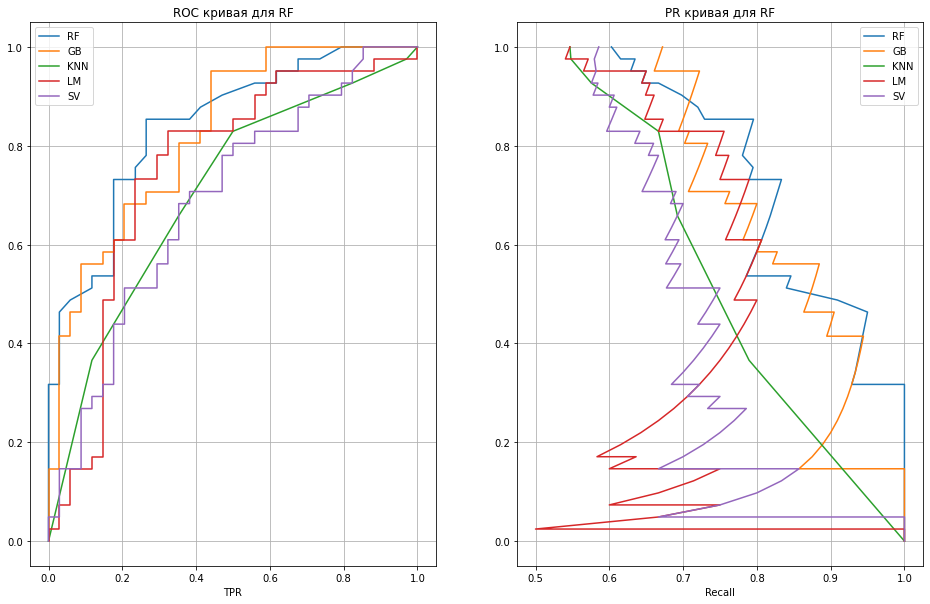

In [25]:
plt.figure(figsize =(16,10))
for i,model in enumerate(list_class["cls"]):
    yp = model.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    list_class['metric'][i] = roc_auc_score(y_test,yp)
    p,r,t = roc_curve(y_test,yp)
    plt.subplot(1,2,1)
    plt.plot(p,r,label = cls_[i])
    p,r,t = precision_recall_curve(y_test,yp)
    plt.subplot(1,2,2)
    plt.plot(p,r,label = cls_[i])
    print(cls_[i],": :",list_class['metric'][i]) 
plt.subplot(1,2,1)    
plt.title('ROC кривая для RF')
plt.grid(True)
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.legend()
plt.subplot(1,2,2)    
plt.title('PR кривая для RF')
plt.grid(True)
plt.xlabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()

**Лушей моделью как и в случае более радикального очищения данных оказался случайный лес**

**В этом случае самыми близкими к модели случайного леса оказались результаты градиентного бустинга (разница составляет 0.016), остальные модели показывают себя хуже, уступая на 0.1.**

**Вывод: в результате была выбрана модель случайного леса**

In [26]:
RFC = RandomForestClassifier(n_estimators=37, random_state=241)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=37, random_state=241)

In [27]:
RFC.score(X_test, y_test)

0.7866666666666666

In [28]:
#from sklearn.metrics import roc_curve, auc, roc_auc_score

rez = np.zeros((10,10))

for i,n_tree in enumerate(np.linspace(1,500,10)): # варианты числа деревьев
    for j,deep_tree in enumerate(np.linspace(1,10,10)): # варианты глубины деревьев
        RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
        yp = RF.fit(X_train,y_train).predict_proba(X_test)[:,1]
        
        #rez[i,j] = auc(y_test, yp)
        rez[i,j] = roc_auc_score(y_test,yp) # сохраняем метрику на отложенной выборке
        del RF

**Построим визуалицию нашей модели**

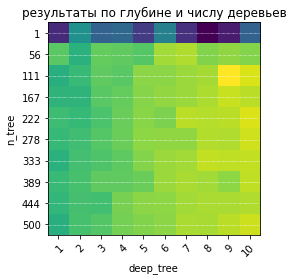

In [29]:
N_tree = 500
Deep_tree = 10

def plot_rez(rez,xlabel,ylabel,title,xyl = [[1,N_tree],[1,Deep_tree]]):
    
    fig, ax = plt.subplots()
    
    im = ax.imshow(rez)
    n = rez.shape
    # We want to show all ticks...
    ax.set_xticks(np.arange(n[1]))
    ax.set_yticks(np.arange(n[0]))
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # ... and label them with the respective list entries
    ax.set_yticklabels(np.linspace(xyl[0][0],xyl[0][1],n[0]).astype(int))
    ax.set_xticklabels(np.linspace(xyl[1][0],xyl[1][1],n[1]).astype(int))

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(n[0]):
        for j in range(n[1]):
            text = ax.text(j, i, rez[i, j],
                           ha="center", va="center", color="w",size=2)

    ax.set_title("результаты по глубине и числу деревьев")
    fig.tight_layout()
    
    plt.show()

plot_rez(rez,'deep_tree','n_tree','ROC_AUC от числа деревьев и их глубины',xyl = [[1,500],[1,10]]) 


**По данному графику можем наблюдать, что оптимальными являются 111 деревьев с глубиной 9**

Создадим объект sklearn, который добавит  полиномиальные признаки

In [30]:
RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
yp = RF.fit(X_train,y_train).predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,yp))

0.830703012912482


In [31]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)                      

In [32]:
X_poly.shape

(224, 276)

In [33]:
RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
yp = RF.fit(X_poly,y_train).predict_proba(X_poly_test)[:,1]
print(roc_auc_score(y_test,yp))

0.8127690100430416


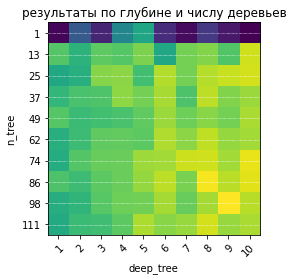

In [36]:
#from sklearn.metrics import roc_curve, auc, roc_auc_score

rez = np.zeros((10,10))

for i,n_tree in enumerate(np.linspace(1,111,10)): # варианты числа деревьев
    for j,deep_tree in enumerate(np.linspace(1,10,10)): # варианты глубины деревьев
        RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
        yp = RF.fit(X_train,y_train).predict_proba(X_test)[:,1]
        
        #rez[i,j] = auc(y_test, yp)
        rez[i,j] = roc_auc_score(y_test,yp) # сохраняем метрику на отложенной выборке
        del RF

plot_rez(rez,'deep_tree','n_tree','ROC_AUC от числа деревьев и их глубины',xyl = [[1,111],[1,10]])

**Произведём калибровку модели**

0.5225225225225225


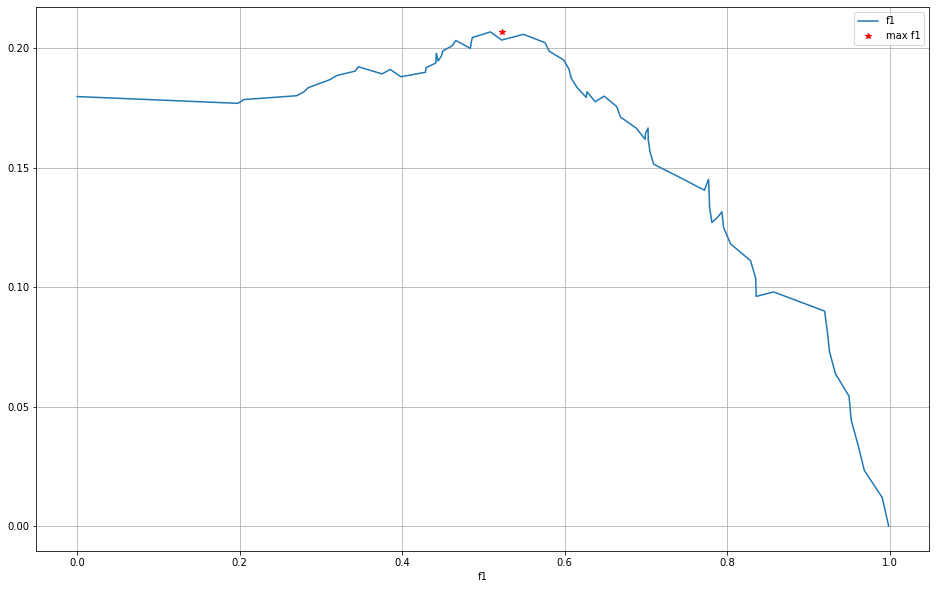

In [37]:
p,r,t = precision_recall_curve(y_test,yp)

f1 = p*r/2/(p+r)

ind_tr = np.argmax(f1)
print(t[ind_tr])

plt.figure(figsize =(16,10))
plt.plot([0]+t.tolist(),f1, label = 'f1')
plt.plot(t[ind_tr],f1[ind_tr],'*r', label = 'max f1')
plt.xlabel('treshold')
plt.xlabel('f1')
plt.legend()
plt.grid(True)
plt.show()